# Libraries

In [1]:
import plotly.express as px

In [2]:
import numpy as np
import pandas as pd

import os
# import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from wordcloud import WordCloud, STOPWORDS

#Text Color
from termcolor import colored

#Data Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

#NLP
from sklearn.feature_extraction.text import CountVectorizer

#WordCloud
from wordcloud import WordCloud, STOPWORDS

#Text Processing
import re
import nltk
nltk.download('popular')

#Language Detection
!pip install langdetect
import langdetect

#Sentiment
from textblob import TextBlob

#ner
import spacy

#Vectorizer
from sklearn import feature_extraction, manifold

#Word Embedding
import gensim.downloader as gensim_api

#Topic Modeling
import gensim

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\MattSzymonski\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\MattSzymonski\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\MattSzymonski\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\MattSzymonski\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\MattSzymonski\AppData\Roaming\nltk_data.
[n

In [3]:
!pip install hvplot
import hvplot.pandas  # custom install

from glob import glob

#from bq_helper import BigQueryHelper
!pip install -e git+https://github.com/SohierDane/BigQuery_Helper#egg=bq_helper

from dask import bag, diagnostics 
from urllib import request

import missingno as msno

Traceback (most recent call last):
  File "c:\python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Python39\Scripts\pip.exe\__main__.py", line 4, in <module>
ModuleNotFoundError: No module named 'pip'


Traceback (most recent call last):
  File "c:\python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Python39\Scripts\pip.exe\__main__.py", line 4, in <module>
ModuleNotFoundError: No module named 'pip'


In [4]:
from PIL import Image

# Setup

### Load CSV files with data

In [5]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')
sample = pd.read_csv('./input/sample_submission.csv')

### Load image files

In [6]:
#Image Folder Paths
train_jpg_directory = './input/train_images'
test_jpg_directory = './input/test_images'

In [7]:
# Retuns list of paths combined with image file names
def getImagePaths(path): 
    image_names = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            fullpath = os.path.join(dirname, filename)
            image_names.append(fullpath)
    return image_names

In [8]:
#Get complete image paths for train and test datasets
train_images_path = getImagePaths(train_jpg_directory)
test_images_path = getImagePaths(test_jpg_directory)

<hr class="solid">

# Data Exploration - Tabular Analysis

In [9]:
train.head()

posting_id                                 image       image_phash  \
0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   
1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   
2  train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg  b94cb00ed3e50f78   
3  train_2406599165  00117e4fc239b1b641ff08340b429633.jpg  8514fc58eafea283   
4  train_3369186413  00136d1cf4edede0203f32f05f660588.jpg  a6f319f924ad708c   

                                               title  label_group  
0                          Paper Bag Victoria Secret    249114794  
1  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   2937985045  
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891  
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188  
4                  Nescafe \xc3\x89clair Latte 220ml   3648931069

In [10]:
test.head()

posting_id                                 image       image_phash  \
0  test_2255846744  0006c8e5462ae52167402bac1c2e916e.jpg  ecc292392dc7687a   
1  test_3588702337  0007585c4d0f932859339129f709bfdc.jpg  e9968f60d2699e2c   
2  test_4015706929  0008377d3662e83ef44e1881af38b879.jpg  ba81c17e3581cabe   

                                               title  
0  Edufuntoys - CHARACTER PHONE ada lampu dan mus...  
1  (Beli 1 Free Spatula) Masker Komedo | Blackhea...  
2   READY Lemonilo Mie instant sehat kuah dan goreng

In [11]:
print(f"Training Dataset Shape: {colored(train.shape, 'yellow')}")
print(f"Test Dataset Shape: {colored(test.shape, 'yellow')}")

Training Dataset Shape: (34250, 5)
Test Dataset Shape: (3, 4)


### Unique Values

In [12]:
for col in train.columns:
    print("Number of unique " + col + ": " + colored(str(len(train[col].unique())), 'yellow'))

Number of unique posting_id: 34250
Number of unique image: 32412
Number of unique image_phash: 28735
Number of unique title: 33117
Number of unique label_group: 11014


### Number of Images

In [13]:
print(f"Number of train images: {colored(len(train_images_path), 'yellow')}")
print(f"Number of test images:  {colored(len(test_images_path), 'yellow')}")

Number of train images: 32412
Number of test images:  3


In [14]:
# Displays images in grid
def display_multiple_img(images_paths, rows, cols):
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,8) )
    for ind,image_path in enumerate(images_paths):
        image=cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
        try:
            ax.ravel()[ind].imshow(image)
            ax.ravel()[ind].set_axis_off()
        except:
            continue;
    plt.tight_layout()
    plt.show()

### Example Train Images

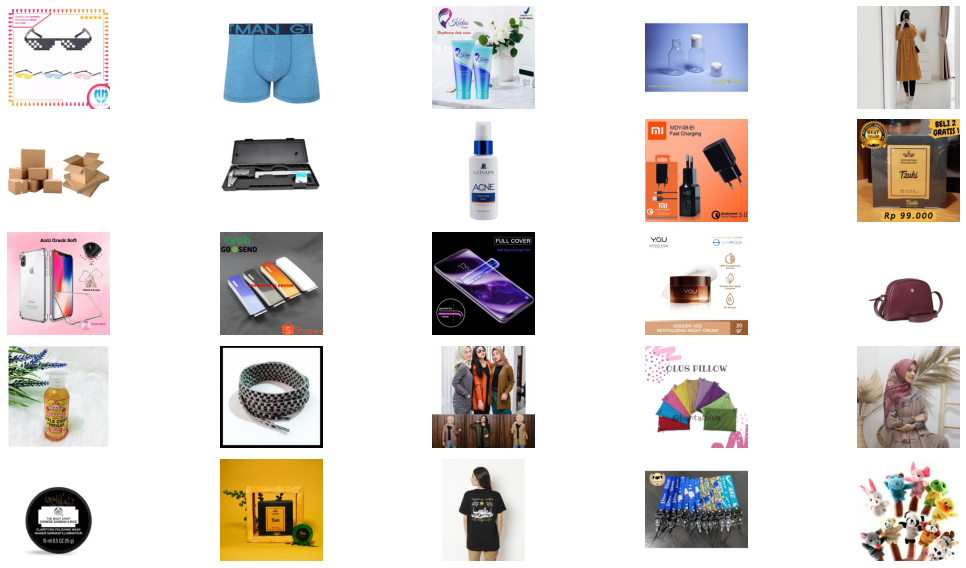

In [15]:
display_multiple_img(train_images_path[50:100], 5, 5)

### Test Images

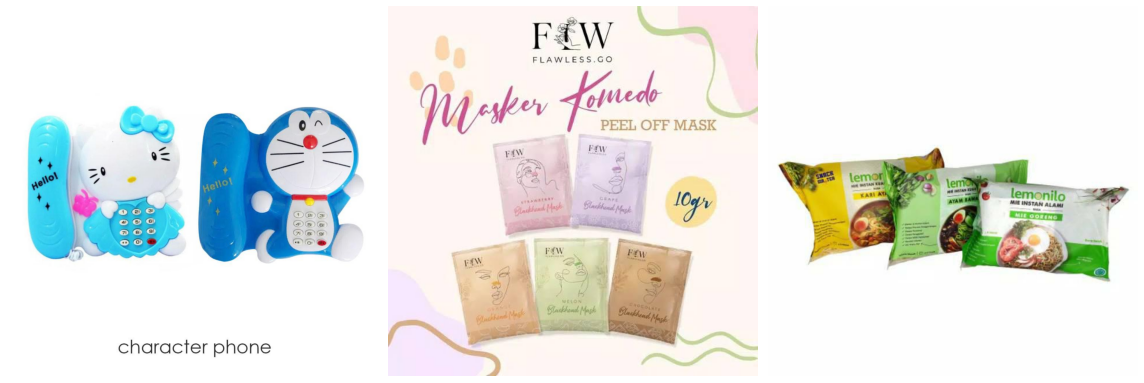

In [16]:
display_multiple_img(test_images_path[0:3], 1, 3)

<hr class="solid">

# Data Exploration - Title Analysis

### Wordcloud

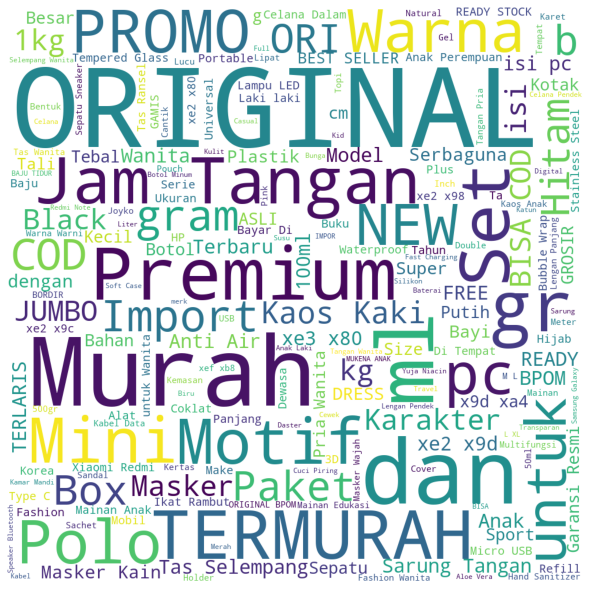

In [17]:
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 1000, height = 1000, background_color ='white', min_font_size = 10, stopwords = stopwords,).generate(' '.join(train['title']))                 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

### Cleaning Titles (Natural Language Processing)

In [18]:
def preprocess_text(text, flg_stemm=False, flg_lemm=True):

    lst_stopwords = nltk.corpus.stopwords.words("english")
    
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()    
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [19]:
#Clean Address
train["clean_title"] = train["title"].apply(lambda x: preprocess_text(x, flg_stemm=False, flg_lemm=True, ))

In [20]:
#Length of Title
train['clean_title_len'] = train['clean_title'].apply(lambda x: len(x))

#Word Count
train['clean_title_word_count'] =train["clean_title"].apply(lambda x: len(str(x).split(" ")))

#Character Count
train['clean_title_char_count'] = train["clean_title"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))

#Average Word Length
train['clean_title_avg_word_length'] = train['clean_title_char_count'] / train['clean_title_word_count']

### Distribution Plots

In [21]:
def plot_distribution(data, x, title):
    fig = px.histogram(data, x = x, width = 1000, height = 500, title = title)    
    fig.show()

### Title Length Distribution - Character Count

In [22]:
plot_distribution(train, x = 'clean_title_char_count', title = 'Title Length Distribution - Character Count')

### Title Length Distribution - Word Count

In [23]:
plot_distribution(train, x = 'clean_title_word_count', title = 'Title Length Distribution - Word Count')

### Word Popularity in Titles

In [24]:
ds = pd.DataFrame.from_dict(list(wordcloud.words_.items()))
ds.columns = ['word', 'score']
ds = ds.sort_values(['score'])
ds['word'] = ds['word'].astype(str)

fig = px.bar(
    ds.tail(30), 
    x="score", 
    y="word", 
    orientation='h', 
    title='Top 30 most popular words in the titles', 
    width=1000, 
    height=1000
)

fig.show()

# Data Exploration - Label Group Exploration

In [25]:
print(f"Number of unique Label Groups: {colored(train.label_group.nunique(), 'yellow')}")

Number of unique Label Groups: 11014


### Image Label Groups by Number of Images

In [40]:
top_names = train['label_group'].value_counts().index.tolist()
top_values = train['label_group'].value_counts().tolist()

d = {'label':top_names,'image_count':top_values}
df = pd.DataFrame(d)

fig = px.histogram(df, x = top_values, width = 1000, height = 500, title = "Number of label groups by number of images in group")    
fig.update_yaxes(title_text='number of label groups',row=1, col=1)
fig.update_xaxes(title_text='number of images',row=1, col=1)
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder="total descending")
fig.show()


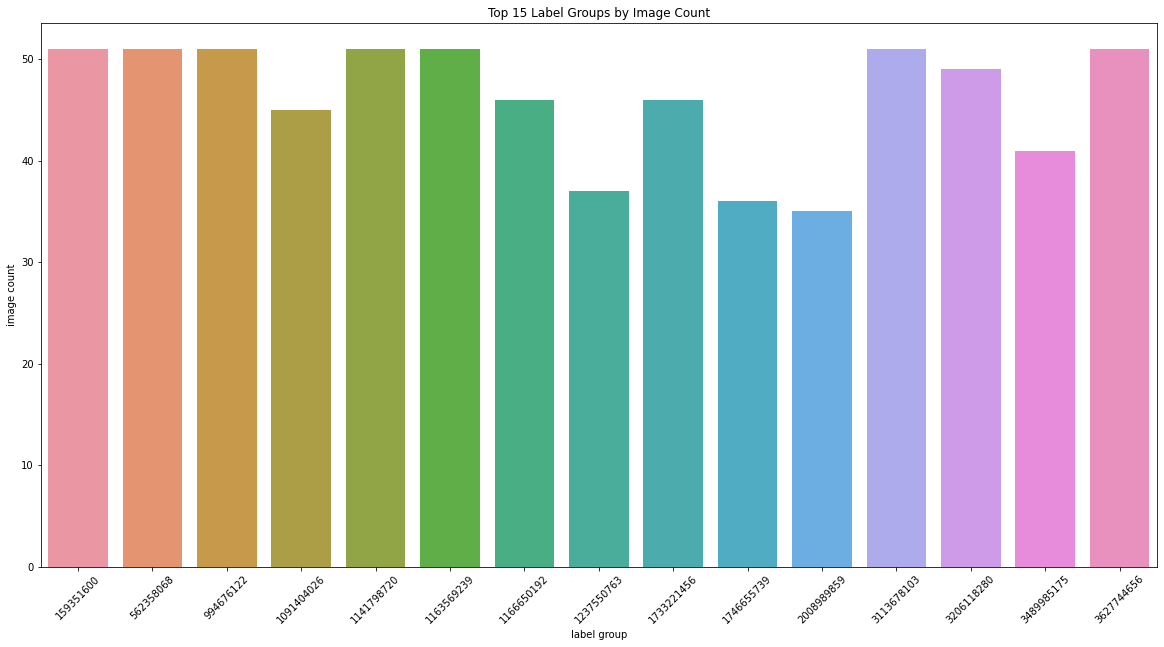

In [31]:
top15_names = train['label_group'].value_counts().index.tolist()[:15]
top15_values = train['label_group'].value_counts().tolist()[:15]

plt.figure(figsize=(20, 10))
sns.barplot(x=top15_names, y=top15_values)
plt.xticks(rotation=45)
plt.xlabel("label group")
plt.ylabel("image count")
plt.title("Top 15 Label Groups by Image Count")
plt.show()

In [ ]:
# Data Exploration - Image Exploration